In [1]:
from symbolic_math import *

# Introduction to Gennaker 

Gennaker is an app that lets you read or write a type of document called a booklet. The characteristic feature of a booklet is that it can conveys ideas that are codified in three complementary ways:

- natural language 
- mathematics
- computer code

## Python and Notebooks

Python is the default code dialect because it is programming language that is closest to a universal second language. 

Gennaker relies heavily on JupyterLab (henceforth JL) and its notebooks. A JL notebook is essentially a text file with code like any other but better comments. 

Neither Gennaker nor JupyterLab try to be an integrated developoment environment (IDE) for writing code. JupyterLab is a toolkit. Gennaker is a collection of tools that make it easy for authors can use to create and distribute technical documents and equally easy for readers to read and experiment with such documents. 

## The Role for Gennaker

In contrast to the familiar tools for creating and read PDFs, Gennaker is committed to equal treatment for authors and readers. 

It is also intended as a set of “training wheels” that make it easy for someone to started using Python and JupyterLab to read and write documents that are like PDFs with working code. Like JupyterLab, Gennaker is open source. The people who are developing Gennaker have zero incentive to lock you into using it. Like training wheels for bicycles, Gennaker succeeds when people stop using it. 

If you are working on macOS or Windows and aren't familiar with Python and JupyterLab, Gennaker makes it trivial to get up and running. All you have to do is download and install an app. (If you are working on Linux, you don't need training wheels.)  

## Booklets
Gennaker is organizes its documents as booklets. In many ways, a booklet is like a software project that will eventually be published as a library. Booklets should also be published, and might even be published on sites such as [`http://pypi.org`](https://pypi.org) that distributes code libraries, but a more natural channel might be a reasearch paper repository analogous to [`https://arxiv.org`](https://arxiv.org) or [`https://nber.org`](https://nber.org). 

Booklets will often (but not always) include a JupyterLab notebook. Frequently they will include other files too. If you look in the browser bar to the right, you'll see that this booklet includes both this notebook, with the characteristic suffix, `.ipynb` and a comma-separated-value file `data.csv` that the code in the notebook reads from.


## Clean and Classic Notebook Interfaces
When you open a notebook that was authored inside Gennaker, the default is to display a decluttered version of the classic user interface of JupyterLab. The file format for a notebook is unchanged, so there are many possibilities:  

- An author can publish a booklet with notebooks that by default using either the clean interface or JupyterLab's classic, full-featured interface.

- No matter what the author decided, a reader can choose which interface to use to display a notebook. 

If you want to see a side by side comparision of the two interfaces, use the main Gennaker page to open the “Classic JupyterLab” booklet. It has a copy of this notebook. Open it and compare it to this version of the notebook to see the difference in the interfaces. 

## What You Can Do With a Gennaker Booklet

### Latex Math and Symbolic Calculations

You can display typeset mathematics using markup from Latex that you type in by hand:
$$V = \sum_{t = 0}^{\infty} \beta^t x_t$$


You sometimes it is easier to build up complex Latex expressions by composing functions. For example, to specify a time dependent desity function you can define some functions and compose them:

In [2]:
g = Lambda(x, exp(-x**(-2))) 
g

Lambda(x, exp(-1/x**2))

In [3]:
h = Lambda(x, a + b*(1-g(x)))
h

Lambda(x, alpha + beta*(1 - exp(-1/x**2)))

In [4]:
r = Lambda(x, (a / h(x)))
r

Lambda(x, alpha/(alpha + beta*(1 - exp(-1/x**2))))

In [12]:
F = Lambda((x, t), (exp(h(x) * t) * (1 - r(x)) + r(x))**(-1))
F

Lambda((x, t), 1/(alpha/(alpha + beta*(1 - exp(-1/x**2))) + (-alpha/(alpha + beta*(1 - exp(-1/x**2))) + 1)*exp(t*(alpha + beta*(1 - exp(-1/x**2))))))

This type of distribtuion function has a time varying proabitatiy mass at zero. Sympy will calculate the limit for you. 

In [6]:
F0 = Lambda(t, limit(F(x, t), x, 0))
F0

Lambda(t, (alpha + beta)/(alpha + beta*exp(alpha*t + beta*t)))

### Graphing

The Python workhorses for scientific visualization and data analysis have long been `matplotlib` and `pandas`. The default package manager was `pip`.

These are widely used and well tested, so of course, Gennaker supports them. But there are newer possibilities you can try. 

The `uv` library can speed things up dramatically, especially on Windows. If you are familiar with `ggplot` from `R`. you might want to try the `plotnine` library. Here, we'll use `polars` to turn a `csv` file into the type of dataframe that `ggplot` expects. 

If we wanted to hide these details from the reader, we could put some of what follows into a `.py` and import from it, just as we did for SymPy. Instead, we can do the `uv` version of a `pip install` on the fly by using the `!` operator to have JupyterLab pass a command onto the operating system shell instead of giving it to the Python interpreter:

In [7]:
# !uv pip install plotnine polars

In [8]:
# from plotnine import ggplot, aes, geom_point, geom_smooth

In [9]:
# from polars import read_csv

We can define a Python dictionary `dtypes` to override the default assumptions that Polars would otherwise make when it reads the data from the `csv` file. 

In [13]:
dtypes = {"x": float, "y": float}

df = read_csv(
    "data.csv",
    schema_overrides=dtypes
)


Finally, we use the layered approach of `ggplot` to define the look of the plot and add some geometric objects. 

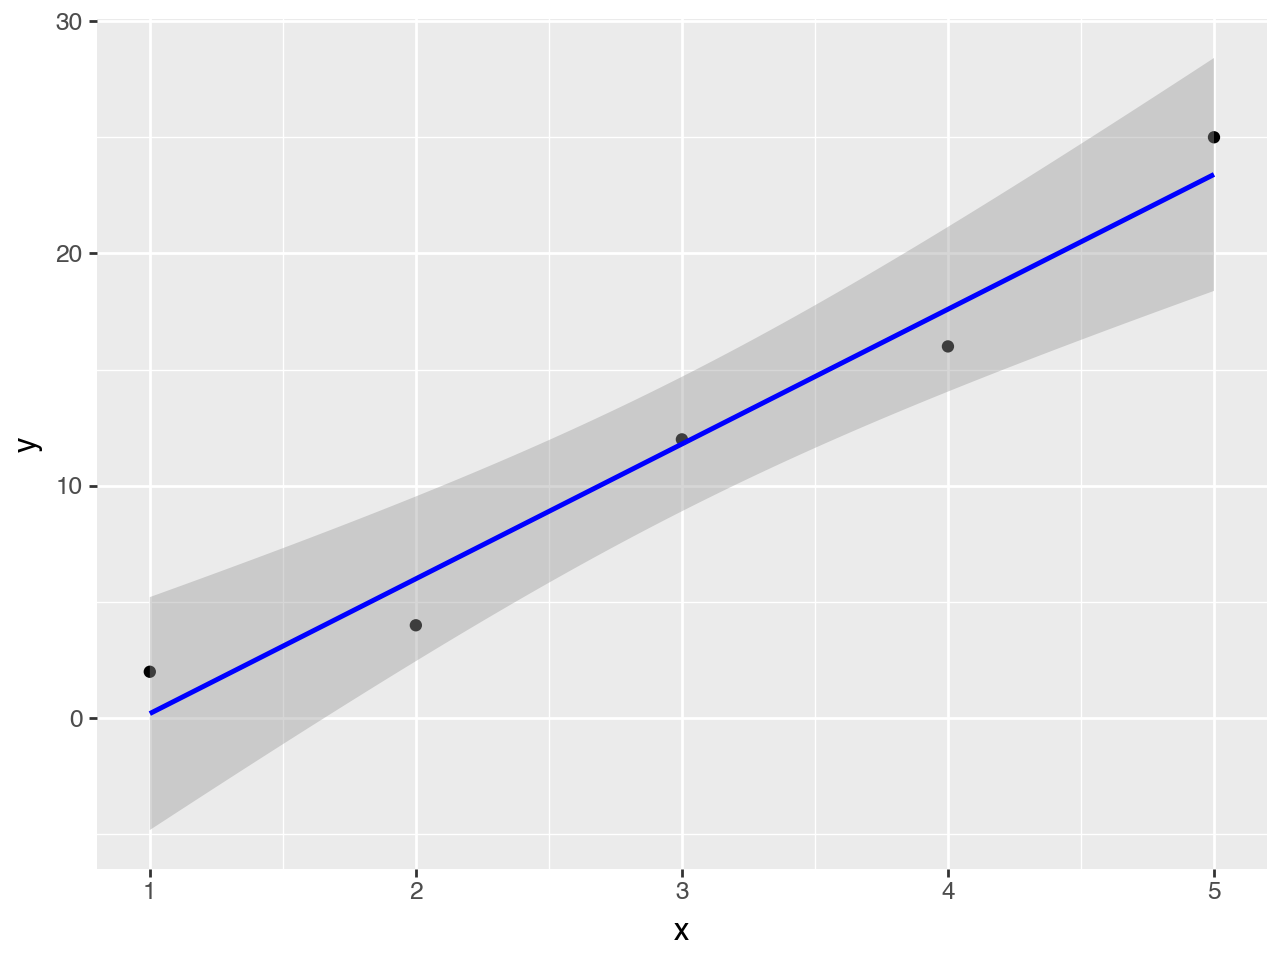

In [11]:
(
    ggplot(data=df, mapping=aes(x="x", y="y"))
    + geom_point()
    + geom_smooth(method="lm", color="blue")
)